# Week 10 Independent lab: Advanced Statistical Techniques in Python

Author: Haiheng Xu  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025  
Date: May 4, 2025 

In [3]:
import os
# 1) Tell loky how many cores you actually have:
os.environ["LOKY_MAX_CPU_COUNT"] = "6"

# 2) Limit MKL/OMP threads to 1 (avoids the KMeans memory‐leak warning):
os.environ["OMP_NUM_THREADS"] = "1"

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metcs

from sklearn.model_selection import train_test_split
# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [6]:
# Import file
os.chdir("C:\\Users\\haihe\\Desktop\\Classes\\Intro to Python\\week10labs\\data")
h_df = pd.read_csv('calihospital.txt', sep='\t')

#### Using `operating income` as a target variable, create a tree

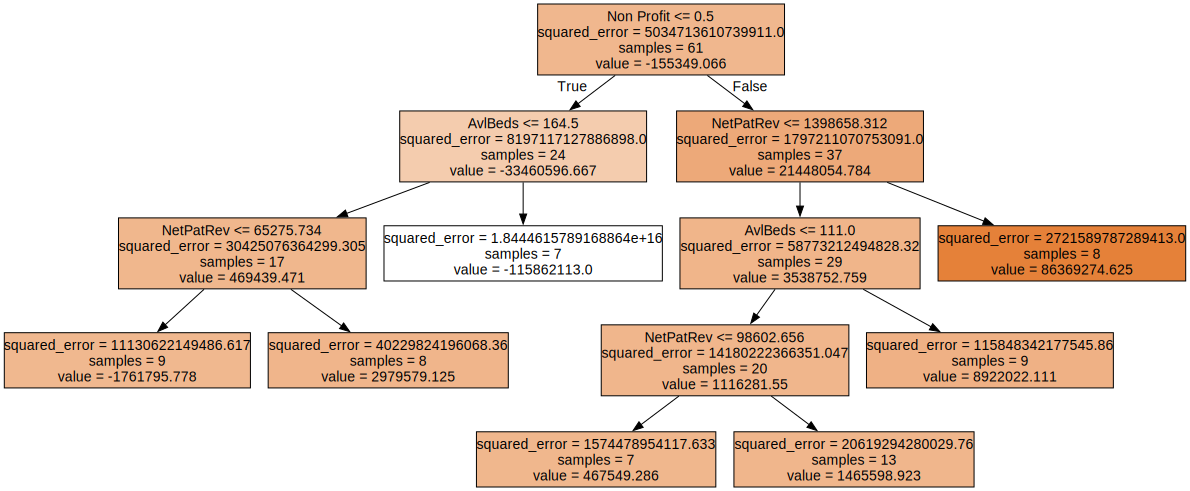

In [8]:
# define which columns are numeric
num1_cols = ['NetPatRev', 'AvlBeds']

# use one-hot encode for categorical variable
X1_cat = pd.get_dummies(h_df['TypeControl'], drop_first=True)

# define predictors and target variable
X = pd.concat([X1_cat, h_df[num1_cols].reset_index(drop=True)], axis=1)
Y = h_df['OperInc']

# fit model(I tried different numbers, 7 seems to me is the best)
tree_model_reg = tree.DecisionTreeRegressor(min_samples_split=7, min_samples_leaf=7)
tree_model_reg.fit(X, Y)

# visualize tree
tree_mod_graph = export_graphviz(tree_model_reg, filled=True, feature_names=X.columns)
graph = graphviz.Source(tree_mod_graph, format="png") 
display(graph)

First splits start with the type of the hospital, it decide if the hospital is non-profit or not. Non-profit hospital tend to have better benefits from the government, they might get tax deduction so they tend to have better income then other type of hospitals. Then it seperate again at available beds <= 164.5. The smaller not non-profit hospitals has less income then non-profit because they have less beds meaning they can have less patient. Then it comes to net patient revenue, the line is 65275. 

#### Using `operating revenue` as a target variable, create a tree

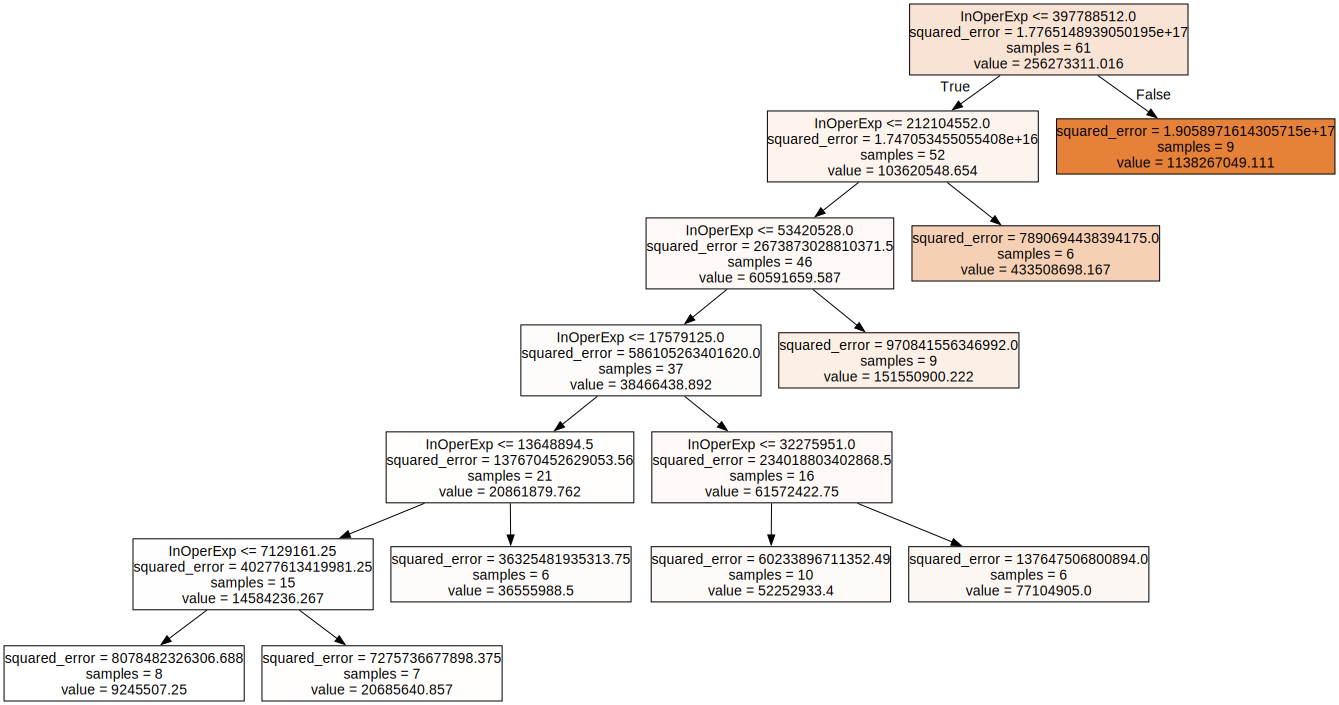

In [11]:
# define which columns are numeric
num2_cols = ['InOperExp', 'AvlBeds']

# use one-hot encode for categorical variable
X2_cat = pd.get_dummies(h_df['TypeControl'], drop_first=True)

# define predictors and target variable
X1 = pd.concat([X2_cat, h_df[num2_cols].reset_index(drop=True)], axis=1)
Y1 = h_df['OperRev']

# fit model
tree_model_reg1 = tree.DecisionTreeRegressor(min_samples_split=6, min_samples_leaf=6)
tree_model_reg1.fit(X1, Y1)

# visualize tree
tree_mod_graph = export_graphviz(tree_model_reg1, filled=True, feature_names=X1.columns)
graph = graphviz.Source(tree_mod_graph, format="png") 
display(graph)

The tree starts seperating at Estimate of the inpatient operating costs <= 397788, it make sense because the more hospitals cost to operate, the more likely they get more revenue. Then it splits at available beds <= 293.5, again it represent the size of the hospital, the more beds, they get more revenue. From that, it just sperate by operating cost

#### Using `TypeControl` as a target variable, create a tree

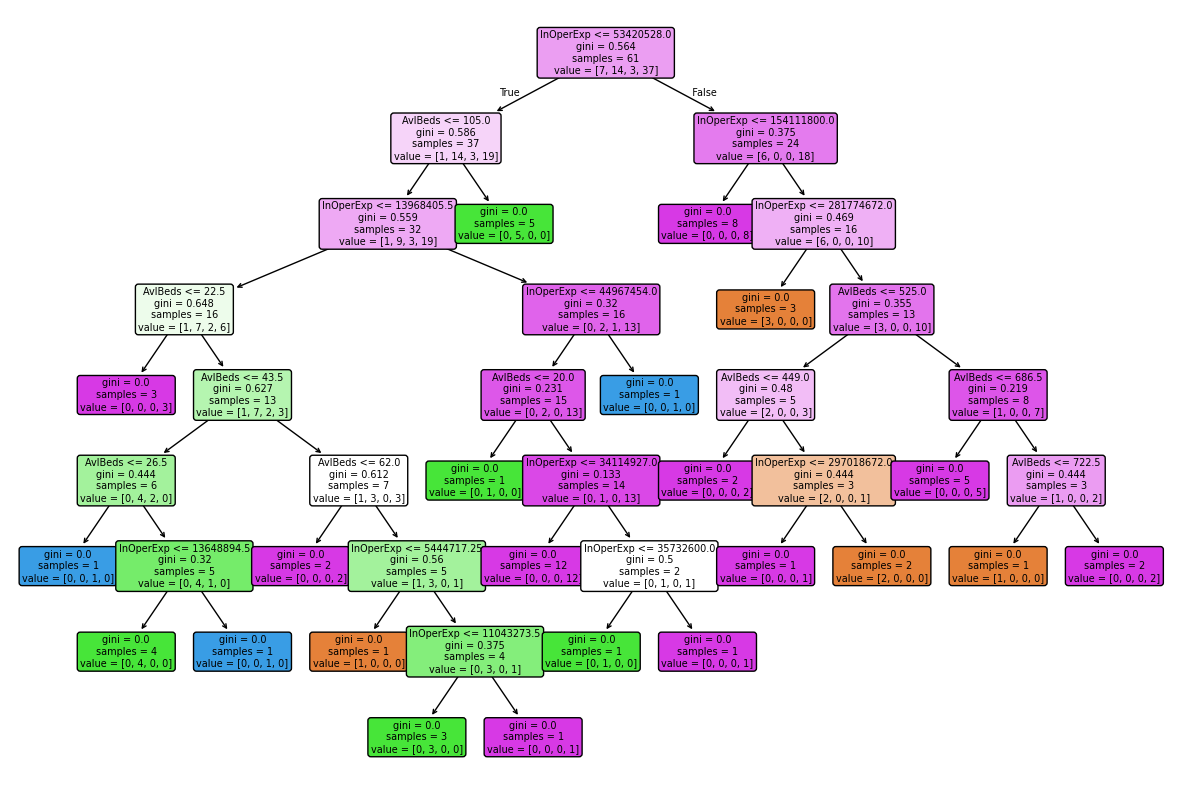

In [43]:
# define which columns are categorical vs numeric
cat_cols = ['DonorType']
num_cols = ['InOperExp', 'AvlBeds']

# use one-hot encode for categorical variable
X_cat = pd.get_dummies(h_df[cat_cols], drop_first=True)

# define predictors and target variable
X = pd.concat([X_cat, h_df[num_cols].reset_index(drop=True)], axis=1)
Y = h_df['TypeControl']

# fit model
tree_model_1 = tree.DecisionTreeClassifier().fit(X, Y)

# visualize tree
plt.figure(figsize=(15,10)) 
tree.plot_tree(tree_model_1, feature_names=X.columns,
                filled=True, rounded=True,
                fontsize=7)
plt.show()


The first split of the tree is at estimate of the inpatient operating costs <= 53420528, it make sense because if it is a government-run hospital normally have larger budget since they will have to meet most people's need, provide service to more people than other types of hospital. Then it splits at beds <= 105, smaller hospitals that run by non-profit or private usually have less scale than government-run hospital.

In [46]:
# get predicted values
predicted = tree_model_1.predict(X)

# get model performance evaluation metrics
print(metcs.classification_report(Y, predicted))

              precision    recall  f1-score   support

 City/County       1.00      1.00      1.00         7
    District       1.00      1.00      1.00        14
    Investor       1.00      1.00      1.00         3
  Non Profit       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



#### Using `DonorType` as a target variable, create a tree

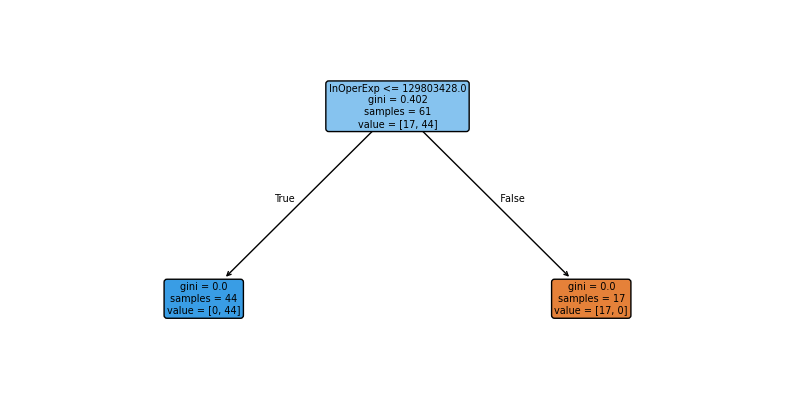

In [19]:
# define which columns are categorical vs numeric
cat_cols1 = ['TypeControl']
num_cols1 = ['InOperExp', 'AvlBeds']

# use one-hot encode for categorical variable
X1_cat = pd.get_dummies(h_df[cat_cols1], drop_first=True)

# define predictors and target variable
X1 = pd.concat([X1_cat, h_df[num_cols1].reset_index(drop=True)], axis=1)
Y1 = h_df['DonorType']

# fit model
tree_model_2 = tree.DecisionTreeClassifier().fit(X1, Y1)

# visualize tree
plt.figure(figsize=(10,5)) 
tree.plot_tree(tree_model_2, feature_names=X1.columns,
                filled=True, rounded=True,
                fontsize=7)
plt.show()

This tree only has 2 leaves because there are only 2 types of donors, and they all have a 0 Gini, meaning the results are pure. There is only one split at the estimate of the inpatient operating costs <= 129803428, which makes sense because big hospitals are likely to draw on alumni networks and small hospitals might have to rely on charity donations.

In [54]:
# get predicted values
predicted1 = tree_model_2.predict(X1)

# get model performance evaluation metrics
print(metcs.classification_report(Y1, predicted1))

              precision    recall  f1-score   support

      Alumni       1.00      1.00      1.00        17
     Charity       1.00      1.00      1.00        44

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



From all the trees, to me, the DonorType model is best because it has the smallest Gini compare to all other models

#### Reference

“Python Machine Learning Decision Tree.” W3Schools, www.w3schools.com/python/python_ml_decision_tree.asp.